# Part 1
1. As a stakeholder representing these companies, your objective is to determine which car has acheived the highest customer satisfaction rate among the three.

a) Obtain the number of comments given in all four reviews and report the results.                                               
b) In the cleaning process, using lemmatization rather than stemming is recommended (Why?) 

😊 Response:                                                                                                                   
Lemmatization and Stemming, both are used to generate root form of derived (inflected) words. However, lemma is an actual language word, whereas stem may not be an actual word.

Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

But that is just generally, it is not always better. Stemming still has some advantages and it will depend on the use case. Some reasons you would use stemming over lemmatization could be:

Some possible exceptions when stemming can be better

Simplicity
Speed
Memory constraints

c) During the cleaning process, you also need to remove numbers and HTML tags e.g. <DOC>, <TEXT>, <AUTHOR> and similar elements.                         
d) The first two questions can be solved using sentiment analysis techniques.                                                   
e) Create appropriate wordclouds for each part to visualize the most frequent words in the reviews.
    

In [1]:
## Read the four dataset as text file
from pathlib import Path
honda_2008 = Path('2008_honda_accord.txt').read_text()
honda_2009 = Path('2009_honda_accord.txt').read_text()
hyundai_2009 = Path('2009_hyundai_sonata.txt').read_text()
toyota_2009 = Path('2009_toyota_corolla.txt').read_text()


In [2]:
# Creating a list of filenames
filenames = ['2008_honda_accord.txt', '2009_honda_accord.txt']
 
# Open file3 in write mode
with open('honda.txt', 'w') as outfile: 
    # Iterate through list
    for names in filenames: 
        # Open each file in read mode
        with open(names) as infile: 
            # read the data from file1 and
            # file2 and write it in file3
            outfile.write(infile.read())
 
        # Add '\n' to enter data of file2
        # from next line
        outfile.write("\n")

In [3]:
honda_2008_2009 = Path('honda.txt').read_text()

In [4]:
from bs4 import BeautifulSoup

## A Function to remove tags
def remove_tags(html):
    soup = BeautifulSoup(html, "html.parser") 
    for data in soup(['style', 'script']):
        data.decompose()
    return ' '.join(soup.stripped_strings)

#print(remove_tags(honda_2008))
honda2008 = remove_tags(honda_2008)
honda2009 = remove_tags(honda_2009)
hyundai2009 = remove_tags(hyundai_2009)
toyota2009 = remove_tags(toyota_2009)


In [6]:
#honda2008

In [48]:
# Cleaning Phase (Normalization)
import re
def clean(text):
    emaill_pattern=r"[a-zA-Z0-9_.+-]@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+"
    phone_pattern=r"\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}"
    text = re.sub(r"[\d#]", "", str(text))
    text = re.sub(r"[^\w\s]", '', str(text))
    text = re.sub('\n', ' ', str(text))
    text =  re.sub(r"\+", "", str(text))
    text = re.sub(r"-", "", str(text))
    text= re.sub(r"/", " ", str(text))
    text= re.sub(r"@", " ", str(text))
    text= re.sub(r"_", " ", str(text))
    text=  re.sub(r"\\", " ", str(text))
    text= re.sub(r"=", " ", str(text))
    text= re.sub(r":", " ", str(text))
    text= re.sub(r"\?", " ? ", str(text))
    text= re.sub(r"!", " ! ", str(text))
    text= re.sub(r"&", " ", str(text))
    text= re.sub(r"\|", " ", str(text))
    text= re.sub(r";", " ", str(text))
    text= re.sub(r"\(", " ", str(text))
    text= re.sub(r"\)", " ", str(text))
    text= re.sub("emaill_pattern","",str(text))
    text= re.sub("phone_pattern","",str(text))

    return(text)

In [4]:
#clean(honda2008)

In [49]:
## Perform clean function
cl_honda_2008 = clean(honda2008)
cl_honda_2009 = clean(honda2009)
cl_hyundai_2009 = clean(hyundai2009)
cl_toyota_2009 = clean(toyota2009)


In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')


In [51]:
## Word Tokenization
from nltk.tokenize import sent_tokenize, word_tokenize
words_honda_2008 = word_tokenize(cl_honda_2008)
words_honda_2009 = word_tokenize(cl_honda_2009)
words_hyundai_2009 = word_tokenize(cl_hyundai_2009)
words_toyota_2009 = word_tokenize(cl_toyota_2009)

In [239]:
#words_toyota_2009

In [52]:
## ## Label positive, neutral and negative
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
nltk.download('vader_lexicon')
stop_words = set(stopwords.words('english'))

def sentiment(Text):
    sid = SentimentIntensityAnalyzer()
    pos_word_list=[]
    neu_word_list=[]
    neg_word_list=[]
    pos_word_score=[]
    neu_word_score=[]
    neg_word_score=[]
    
    for word in Text:
        if word not in stop_words:
            if (sid.polarity_scores(word)['compound']) >= 0.5:
                pos_word_list.append(word)
                pos_word_score.append(sid.polarity_scores(word)['compound'])
            elif (sid.polarity_scores(word)['compound']) <= -0.5:
                neg_word_list.append(word)
                neg_word_score.append(sid.polarity_scores(word)['compound'])
            else:
                neu_word_list.append(word)
                neu_word_score.append(sid.polarity_scores(word)['compound'])
    return(pos_word_list,pos_word_score,neg_word_list,neg_word_score,neu_word_list,neu_word_score)
     #print(len(pos_word_list),len(neg_word_list))
    

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ataeii\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [53]:
## Perform Sentiment Analysis
from collections import Counter

pos_honda_2008=sentiment(words_honda_2008)[0]
neg_honda_2008=sentiment(words_honda_2008)[2]

pos_honda_2009=sentiment(words_honda_2009)[0]
neg_honda_2009=sentiment(words_honda_2009)[2]

pos_hyunda_2009=sentiment(words_hyundai_2009)[0]
neg_hyunda_2009=sentiment(words_hyundai_2009)[2]

pos_toyota_2009=sentiment(words_toyota_2009)[0]
neg_toyota_2009=sentiment(words_toyota_2009)[2]

print("pos_honda_2008:" ,len(pos_honda_2008))
print("pos_honda_2009:" ,len(pos_honda_2009))
print("pos_hyunda_2009:" ,len(pos_hyunda_2009))
print("pos_toyota_2009:" ,len(pos_toyota_2009))

print("neg_honda_2008:" ,len(neg_honda_2008))
print("neg_honda_2009:" ,len(neg_honda_2009))
print("neg_hyunda_2009:" ,len(neg_hyunda_2009))
print("neg_toyota_2009:" ,len(neg_toyota_2009))

print("total_honda_2008:" ,len(pos_honda_2008)-len(neg_honda_2008))
print("total_honda_2009:" ,len(pos_honda_2009)-len(neg_honda_2009))
print("total_hyunda_2009:" ,len(pos_hyunda_2009)-len(neg_hyunda_2009))
print("total_toyota_2009:" ,len(pos_toyota_2009)-len(neg_toyota_2009))


pos_honda_2008: 946
pos_honda_2009: 1892
pos_hyunda_2009: 662
pos_toyota_2009: 547
neg_honda_2008: 140
neg_honda_2009: 280
neg_hyunda_2009: 47
neg_toyota_2009: 51
total_honda_2008: 806
total_honda_2009: 1612
total_hyunda_2009: 615
total_toyota_2009: 496


In [54]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 
import numpy as np
from PIL import Image
#text = " ".join(cat.split()[1] for cat in pos_hyunda_2009.category)
# Creating word_cloud with text as argument in .generate() method


mask = np.array(Image.open("Hyunda.png"))


pos_honda_2008_txt = ' '.join([str(item) for item in pos_honda_2008])
neg_honda_2008_txt = ' '.join([str(item) for item in neg_honda_2008])

pos_honda_2009_txt = ' '.join([str(item) for item in pos_honda_2009])
neg_honda_2009_txt = ' '.join([str(item) for item in neg_honda_2009])

pos_hyunda_2009_txt = ' '.join([str(item) for item in pos_hyunda_2009])
neg_hyunda_2009_txt = ' '.join([str(item) for item in neg_hyunda_2009])

pos_toyota_2009_txt = ' '.join([str(item) for item in pos_toyota_2009])
neg_toyota_2009_txt = ' '.join([str(item) for item in neg_toyota_2009])


#print(pos_honda_2008_txt)

word_cloud1 = WordCloud(background_color = "white",
             mask = mask,
             max_words = 2000,
             max_font_size = 500,
             random_state = 42,
             width = mask.shape[1],
             height = mask.shape[0]).generate(pos_honda_2008_txt)
word_cloud2 = WordCloud(background_color = "white",
             mask = mask,
             max_words = 2000,
             max_font_size = 500,
             random_state = 42,
             width = mask.shape[1],
             height = mask.shape[0]).generate(neg_honda_2008_txt)
word_cloud3 = WordCloud(background_color = "white",
             mask = mask,
             max_words = 2000,
             max_font_size = 500,
             random_state = 42,
             width = mask.shape[1],
             height = mask.shape[0]).generate(pos_honda_2009_txt)
word_cloud4 = WordCloud(background_color = "white",
             mask = mask,
             max_words = 2000,
             max_font_size = 500,
             random_state = 42,
             width = mask.shape[1],
             height = mask.shape[0]).generate(neg_honda_2009_txt)
word_cloud5 = WordCloud(background_color = "white",
             mask = mask,
             max_words = 2000,
             max_font_size = 500,
             random_state = 42,
             width = mask.shape[1],
             height = mask.shape[0]).generate(pos_hyunda_2009_txt)
word_cloud6 = WordCloud(background_color = "white",
             mask = mask,
             max_words = 2000,
             max_font_size = 500,
             random_state = 42,
             width = mask.shape[1],
             height = mask.shape[0]).generate(neg_hyunda_2009_txt)
word_cloud7 = WordCloud(background_color = "white",
             mask = mask,
             max_words = 2000,
             max_font_size = 500,
             random_state = 42,
             width = mask.shape[1],
             height = mask.shape[0]).generate(pos_toyota_2009_txt)
word_cloud8 = WordCloud(background_color = "white",
             mask = mask,
             max_words = 2000,
             max_font_size = 500,
             random_state = 42,
             width = mask.shape[1],
             height = mask.shape[0]).generate(neg_toyota_2009_txt)



FileNotFoundError: [Errno 2] No such file or directory: 'Hyunda.png'

(-0.5, 539.5, 359.5, -0.5)

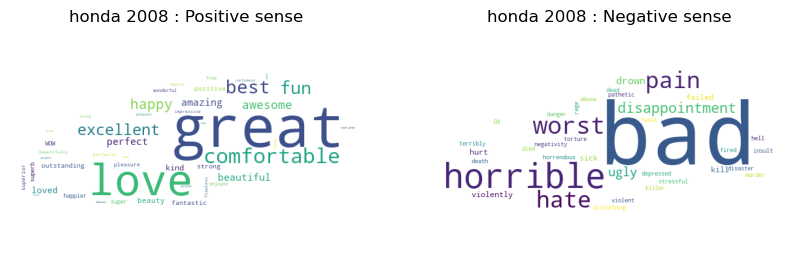

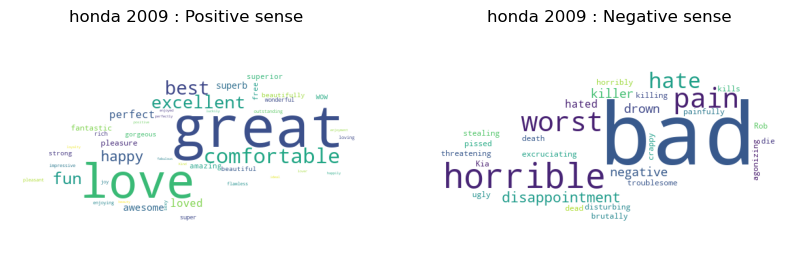

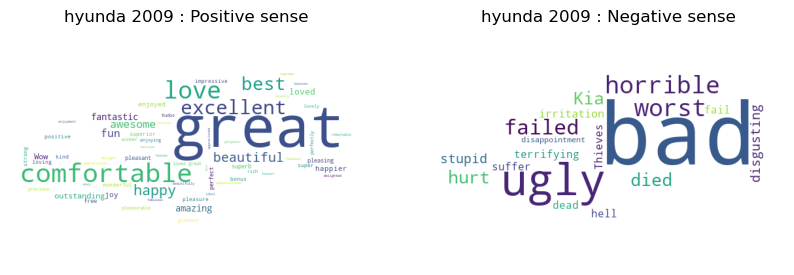

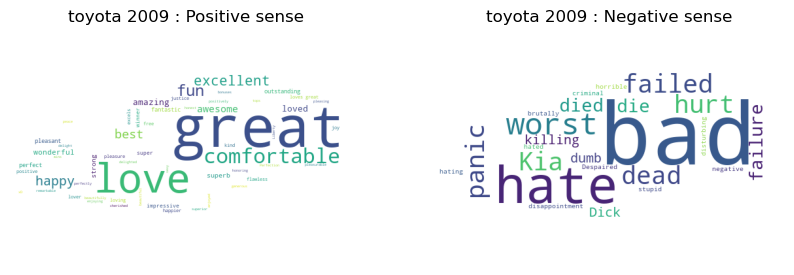

In [16]:
#Display the generated Word Cloud

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(word_cloud1)
ax1.set_title("honda 2008 : Positive sense")
ax1.axis("off")
ax2.imshow(word_cloud2)
ax2.set_title("honda 2008 : Negative sense")
ax2.axis("off")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(word_cloud3)
ax1.set_title("honda 2009 : Positive sense")
ax1.axis("off")
ax2.imshow(word_cloud4)
ax2.set_title("honda 2009 : Negative sense")
ax2.axis("off")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(word_cloud5)
ax1.set_title("hyunda 2009 : Positive sense")
ax1.axis("off")
ax2.imshow(word_cloud6)
ax2.set_title("hyunda 2009 : Negative sense")
ax2.axis("off")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(word_cloud7)
ax1.set_title("toyota 2009 : Positive sense")
ax1.axis("off")
ax2.imshow(word_cloud8)
ax2.set_title("toyota 2009 : Negative sense")
ax2.axis("off")

# Part 2
2. Additionally, you want to investigate whether the satisfaction rate for the Honda Accord has significantly improved from 2008 to 2009. To answer this question, you will also need to analyze the dataset 2008_honda_accord, which consists of customer reviews for the Honda Accord from the year 2008.                                                                                 

d) The first two questions can be solved using sentiment analysis techniques.                                                   
e) Create appropriate wordclouds for each part to visualize the most frequent words in the reviews.

In [15]:
## The Data frame includes the frequency of positive and negative words
freq = [946,489,662,547,140,89,47,51]
Type = ["honda","honda","hyunda","toyota","honda","honda","hyunda","toyota"]
Year = ["2008","2009","2009","2009","2008","2009","2009","2009"]
Sense = ["Positive","Positive","Positive","Positive","Negative","Negative","Negative","Negative"]
dict = {'freq': freq, 'Type': Type, 'Year': Year, 'Sense': Sense}
DATA = pd.DataFrame (dict)
DATA

,freq,Type,Year,Sense
0,946,honda,2008,Positive
1,489,honda,2009,Positive
2,662,hyunda,2009,Positive
3,547,toyota,2009,Positive
4,140,honda,2008,Negative
5,89,honda,2009,Negative
6,47,hyunda,2009,Negative
7,51,toyota,2009,Negative


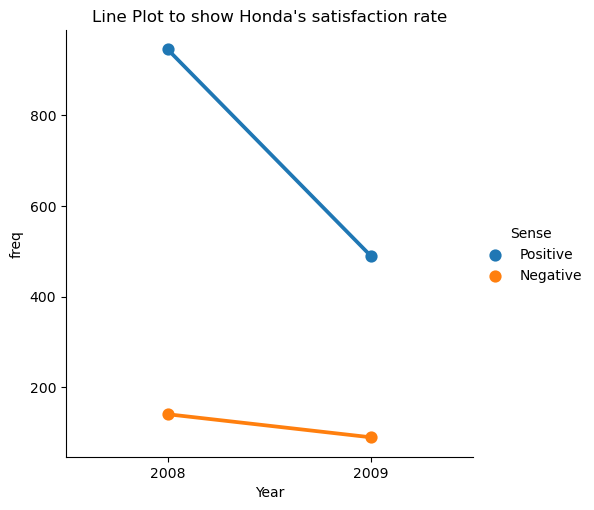

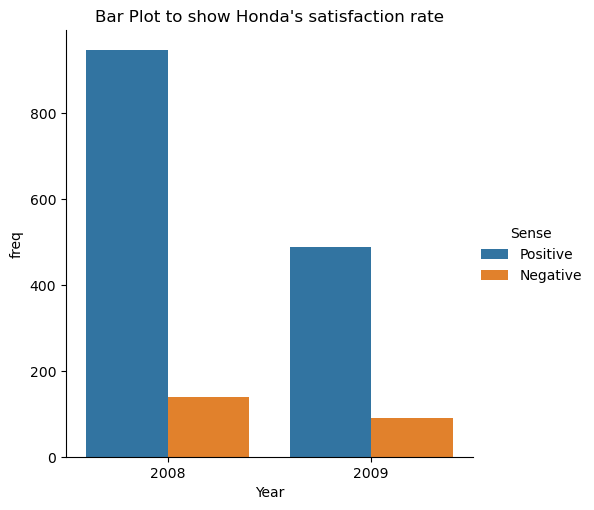

In [16]:
import seaborn as sns
## satisfaction rate for the Honda Accord has significantly improved from 2008 to 2009
DATA_honda = DATA[(DATA.Type == "honda")]
## Line plot
sns.catplot(data=DATA_honda, x="Year", y="freq", hue="Sense", kind="point").set(title="Line Plot to show Honda's satisfaction rate")
## Bar plot
sns.catplot(data=DATA_honda, x="Year", y="freq", hue="Sense", kind="bar").set(title="Bar Plot to show Honda's satisfaction rate")

# Part 3
3. In the end, your final goal is to categorize the customer reviews for the Honda Accord (only those of the year 2008) into k meaningful groups.                                                                                                               


f) Determine the optimal value of k in Question 3.                                                                               
g) (optional) Feel free to obtain any other relevant outputs, such as evaluation metrics or additional plots.                   
h) (optional) If you found that the algorithm used in Question 3 does not provide satisfactory performance, you can try incorporating the datasets 2008_honda_accord and 2009_honda_accord to cluster the reviews again, aiming for better results.

In [93]:
def clean_text(df, col):
    return df[col].apply(lambda x: re.sub(r"&", " ", str(x)))\
                  .apply(lambda x: re.sub(r"[0-9]", "", str(x)))\
                  .apply(lambda x: re.sub(r'\n', ' ', str(x)))\
                  .apply(lambda x: re.sub(r"\+", "", str(x)))\
                  .apply(lambda x: re.sub(r"-", "", str(x)))\
                  .apply(lambda x: re.sub(r"@", " ", str(x)))\
                  .apply(lambda x: re.sub(r"_", " ", str(x)))\
                  .apply(lambda x: re.sub(r"\\", " ", str(x)))\
                  .apply(lambda x: re.sub(r":", " ", str(x)))

In [94]:
#txt = honda_2008 
txt = honda_2008_2009
x = txt.split("\n\n</DOC>\n<DOC>\n\n\n") 
df= pd.DataFrame(x)[1:]
df.columns = ["reviews"]
#sample_text

In [57]:
#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['clean_reviews'] = clean_text(df, 'reviews')
sample_text = ' '.join([str(item) for item in df.clean_reviews])

tokens = word_tokenize(sample_text)
# Remove stop words
stop_words = set(stopwords.words("english"))
filtered_tokens= [word for word in tokens if word.lower() not in stop_words]
# Perform Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
# Join the processed tokens into a string
processed_text = ' '.join(lemmatized_tokens)


In [97]:
#processed_text

In [98]:
from sklearn import preprocessing
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp

selector = VarianceThreshold()
X_tfidf_no_const = selector.fit_transform(X_tfidf)

scaler= StandardScaler(with_mean=False)
X_tfidf_no_const_standardized= scaler.fit_transform(X_tfidf_no_const)

X=X_tfidf
clf = TruncatedSVD(100)
Xpca = clf.fit_transform(X)
X_tfidf_pca = Xpca
#pca = PCA(n_components=10)
#X_tfidf_pca = pca.fit_transform(X_tfidf_no_const_standardized)
clf.explained_variance_ratio_.sum()

0.3936739814687505

In [99]:
type(Xpca)

numpy.ndarray

C:\Users\Ataeii\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ataeii\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ataeii\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ataeii\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ataeii\anaconda3\lib\site-packages\sklearn\

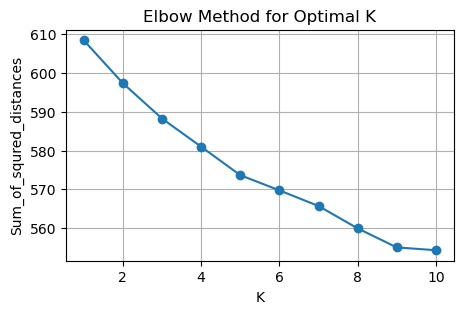

In [100]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'pca_data' contains your PCA-reduced data # You may need to replace this with your actual data
# Range of K values to test
k_values = range (1, 11)
inertia_values = []
for k in k_values:
    kmeans= KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(X_tfidf_pca)
    inertia_values.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(5,3))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('K')
plt.ylabel('Sum_of_squred_distances')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

C:\Users\Ataeii\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calinski-Harabaz Index: 25.423290460568506


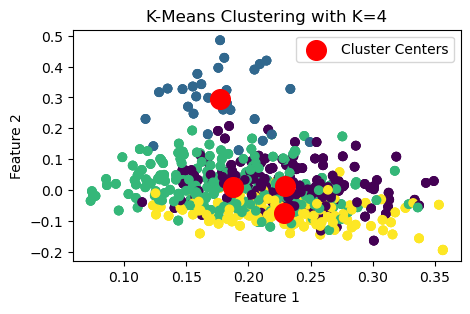

In [101]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

data = X_tfidf_pca
kmeans=KMeans(n_clusters=4, random_state=0) # You can change the random_state if needed
kmeans.fit(data)

calinski_score = calinski_harabasz_score(data, kmeans.labels_)

#Calculate the Calinski-Harabaz index calinski_score calinski_harabasz_score (data, kmeans.labels_)
print("Calinski-Harabaz Index:", calinski_score)
#Visualize the clusters
plt.figure(figsize=(5, 3))
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers [:, 0], centers [:, 1], s=200, marker='o', c='red', label='Cluster Centers')
plt.title("K-Means Clustering with K=4")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()